# P1 - Stroop Effect
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink.
The participant’s task is to say out loud the color of the ink in which the word is printed. 
The task has two conditions: a congruent words condition, and an incongruent words condition.
In the congruent words condition, the words being displayed are color words whose names match the colors in which they are 
printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not
match the colors in which they are printed: for example PURPLE, ORANGE. In both cases, we measure the time it takes to name
the ink colors.

# My test results:
Time for Congruent words - 10.905
Time for Incongruent words - 30.41

1) What is our independent variable? What is our dependent variable?
Independent variable is: The colour congruency is the varable being manipulated in the experiment.
Dependent variable is: The time it takes to recognize the colors of the mismatch colour congruency.
    
2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform?
   Justify your choices.
   
Null Hypothsis, H0 - The mismatch of color to word will have no effect or decrease time to recognize.

Alternate Hypothesis, H1 - The mismatch of color to word will increase time to recognize.

H0: μi =μc (μi - population mean of incongruent values, μc - population mean of congruent values)

HA: μi > μc (μi - population mean of incongruent values, μc - population mean of congruent values)
    
# statistical test choices and assumptions
I have chosen 95% confidence interval.So alpha=0.05.
Paired one tail t-test -> with two tests per participant this test show if the mean of incongruent words is statistically 
significantly different from the congruent words at an alpha of 0.05.

# Assumptions
I will be using a t-test instead of a z-test because 
1) the population standard deviation is unknown 
2) the sample set is less than 30. The t-test will be a one tailed t-test i.e. alternative hypothesis is that
participant's incongruent sample mean will be larger than the participant's congruent sample mean so it is positive one tailed.


In [2]:

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import t
import seaborn as sns
import math

stroopeffect = pd.read_csv("stroopdata.csv")

In [2]:
print(stroopeffect)

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


In [3]:
stroopeffect.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [4]:
# median / 50% values
congruent = stroopeffect['Congruent']
incongruent = stroopeffect['Incongruent']
congruent.median(), incongruent.median()

(14.3565, 21.0175)


# Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
sample size = 24
mean: xbar = Sigma{x}/n (where xbar is the sample mean, x is the value and n is the number of samples)
Congruent: 14.05, Incogruent: 22.02

median:
Congruent: 14.3565, Incongruent: 21.0175

sample std. deviation: sigma = \Sigma{(x - xbar)^2}/n
Congruent: 3.56, Incongruent: 4.80

# Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plots.

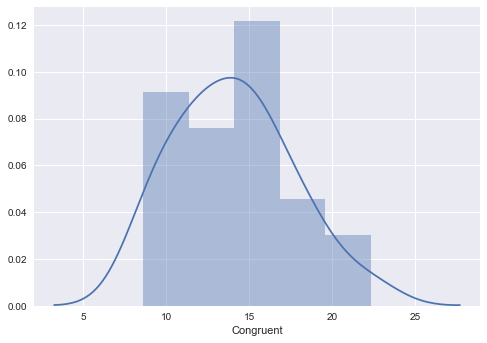

In [3]:
sns.distplot(stroopeffect['Congruent'])
The data is more or less normally distributed. And just like we saw before, the middle of the data is a little bit less than 15.

The data is more or less normally distributed. And just like we saw before, the middle of the data is a little bit less than 15.

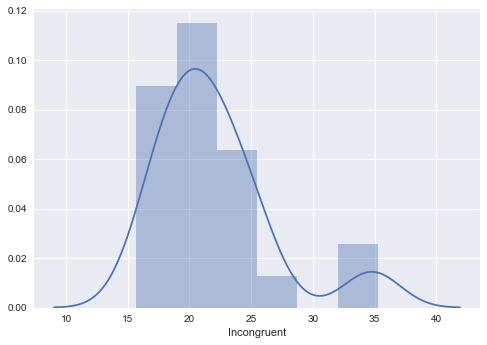

In [4]:
sns.distplot(stroopeffect['Incongruent'])

There are some interesting data points on the upper end of this distribution that skew it right, other than that, it looks like
we expected it to be.

# Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Our standard deviation of the differences is calculated below.

In [8]:
stroopeffect['Difference'] = stroopeffect['Congruent'] - stroopeffect['Incongruent']
stroopeffect['Difference'].std(axis=0)

4.864826910359056

In [23]:
# t-critical value for a 95% confidence level and 23 d.f.
t.ppf(.95, 23)

1.7138715277470473

For a confidence level of 95% and 23 degrees of freedom, our t-critical value ends up being 1.7139


Our point estimate for the difference of the means is: 22.02 - 14.05 = 7.97

So our t-statistics value will be calculated as follows.

In [14]:
7.97/(4.864 / math.sqrt(24))

8.027316303446517

standard deviation, sd = 4.86

standard error of the difference, SE = sd/√n = 4.86/√24 = 0.99

t-statistic, T = point-difference/SE = 7.97/0.99 = 8.02 on 23df

t-critical=1.713

t-distribution with n-1 degrees of freedom (df = 23). 

The result is significant at p < 0.05%.

Because our t-statistic (8.02) is greater than our critical value (1.7139), we can reject the null hypothesis.

This means that it does take mmore time to do the incongruent task than it does to do the congruent task.

This matches up with what we expected.


# Hypothesis
I reject the null hypothesis, the colour incongruent does cause a greater time response

# Conclusion
The results match my expectations.

# Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I believe it's a subconscious or habitual behaviour where commonly used words are glanced over and easily recognized in your mind and therefore, because the color and words match, it takes little effort to say the word/colour. However, when the word and colour are mismatched, we first think of the word and then need to correct to say the colour causing either errors or more time to provide the correct response.
I imagine replacing letters with numbers in the experiment would yeild the same results.